In [1]:
import os
import sys
import pdb
import copy
import glob
import warnings
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.util as cutil
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
from matplotlib import colors
import matplotlib.ticker as mticker
from matplotlib.gridspec import GridSpec
import matplotlib.transforms as mtransforms
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

sys.path.append(os.path.abspath("/global/homes/j/jhollo/repos/climate_util"))
from PyTEMDiags import sph_zonal_averager
import climate_toolbox as ctb
import artist_utils as au

# ---------- matplotlib settings

mpl.rcParams.update(mpl.rcParamsDefault)

SMALL_SIZE  = 9
MEDIUM_SIZE = 11
BIG_SIZE    = 12
BIGGER_SIZE = 14

plt.rc('font', size=MEDIUM_SIZE)         # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

params = {'text.usetex': False, 'mathtext.fontset': 'stixsans'}
plt.rcParams.update(params)

print('done')

done


In [9]:
# ==================================
# ========= read data ==============

runloc = '/pscratch/sd/j/jhollo/E3SM/E3SMv2_cases/hsw_cases/extra_runs_for_hswPaper'
timeslice = slice(5*360, 10*360)
latslice  = slice(-7, 7)

print('reading HS data...')
run = glob.glob('{}/E3SM_ne16_L72_FIDEAL_HsHswMods_comparison_HS_8year/run/*.h0.*.nc'.format(runloc))[0]
run = xr.open_dataset(run)
run = run.assign_coords(time = ctb.time2day(run['time']))
T_HS = run['T'].sel(time=timeslice).mean('time')

print('reading HSW data...')
run = glob.glob('{}/E3SM_ne16_L72_FIDEAL_HsHswMods_comparison_HSW_8year/run/*.h0.*.nc'.format(runloc))[0]
run = xr.open_dataset(run)
run = run.assign_coords(time = ctb.time2day(run['time']))
T_HSW = run['T'].sel(time=timeslice).mean('time')

print('reading HSWMod data...')
run = glob.glob('{}/E3SM_ne16_L72_FIDEAL_HsHswMods_comparison_HSWMods_8year/run/*.h0.*.nc'.format(runloc))[0]
run = xr.open_dataset(run)
run = run.assign_coords(time = ctb.time2day(run['time']))
T_HSWMod = run['T'].sel(time=timeslice).mean('time')

print('reading mean climate Z3...')
mean_clim = '/pscratch/sd/j/jhollo/E3SM/E3SMv2_cases/sai_cases/ic_ens/HSW_SAI_ne16pg2_L72_3600day_mc/run/HSW_SAI_ne16pg2_L72_3600day_mc.eam.h0.0001-01-01-00000.nc'
mean_clim = xr.open_dataset(mean_clim)
mean_clim = mean_clim.assign_coords(time = ctb.time2day(mean_clim['time']))
mean_clim = mean_clim.sel(time=timeslice).mean('time')
Z3        = mean_clim['Z3']

lev     = run['lev']
datlat  = run['lat']
lat     = np.linspace(-90, 90, 181)
weights = xr.DataArray(np.cos(np.deg2rad(lat)), coords={'lat':lat}).sel(lat=latslice)

print('getting zonal means...')
zm       = sph_zonal_averager(datlat, lat, L=70, debug=False)
zm.sph_compute_matrices()
T_HS     = zm.sph_zonal_mean(T_HS.T).sel(lat=latslice)
T_HSW    = zm.sph_zonal_mean(T_HSW.T).sel(lat=latslice)
T_HSWMod = zm.sph_zonal_mean(T_HSWMod.T).sel(lat=latslice)
Z3       = zm.sph_zonal_mean(Z3.T).sel(lat=latslice)

print('getting meridional means...')
T_HS      = T_HS.weighted(weights).mean('lat')
T_HSW     = T_HSW.weighted(weights).mean('lat')
T_HSWMod  = T_HSWMod.weighted(weights).mean('lat')
Z3        = Z3.weighted(weights).mean('lat')

print('done')

reading HS data...
reading HSW data...
reading HSWMod data...
reading mean climate Z3...
getting zonal means...
getting meridional means...
done


In [71]:
lev - 1000

<xarray.DataArray 'lev' (lev: 72)>
array([-999.87617459, -999.81717076, -999.73005114, -999.6014183 ,
       -999.41149085, -999.13106143, -998.71700509, -998.10564752,
       -997.20297306, -995.87016684, -994.03155063, -991.62259562,
       -988.52621277, -984.66606178, -980.00366202, -974.55530349,
       -968.40674871, -961.63371691, -954.32880206, -946.69043857,
       -938.98481833, -931.52360977, -924.6446641 , -918.05372488,
       -911.08945685, -903.53332656, -895.33503271, -886.43999858,
       -876.78900857, -866.31782007, -854.95673447, -842.63012216,
       -829.25592048, -814.74509777, -799.00106013, -781.91900297,
       -763.38521341, -743.27631409, -721.45844169, -697.78635988,
       -672.10249391, -644.23587056, -614.00097608, -581.19653712,
       -545.60418601, -507.53142598, -468.36046864, -429.3750969 ,
       -391.35622558, -354.68003204, -319.50195556, -286.29536168,
       -255.52517068, -227.63716206, -203.04725028, -182.13117652,
       -164.90482911, -150.33875089, -136.82357435, -123.62935167,
       -110.7772639 ,  -98.28816671,  -86.18249558,  -74.48025185,
        -63.20100518,  -52.36384115,  -41.98723363,  -32.0889196 ,
        -22.68593613,  -13.79466684,   -6.2430437 ,   -1.50356051])
Coordinates:
  * lev      (lev) float64 0.1238 0.1828 0.2699 0.3986 ... 986.2 993.8 998.5

In [75]:
np.interp(0.1, Z3[::-1]/1000, lev[::-1]) - 1000

-11.13281479571367

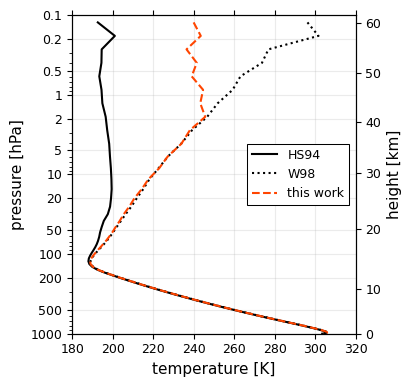

In [66]:
# =============================================
# ===============  plotting  ==================

fig = plt.figure(figsize=(4.25, 4))
ax = fig.add_subplot()

levlim   = [0.1, 1000]
levticks = [1000, 500, 200, 100, 50, 20, 10, 5, 2, 1, 0.5, 0.2, 0.1]
Tlim     = [180, 320]
Tticks   = np.arange(180, 321, 20)
colors   = ['#648FFF', '#DC267F', '#FE6100', '#FFB000']

ax.plot(T_HS, lev, '-', color='k', label='HS94')
ax.plot(T_HSW, lev, ':', color='k', label='W98')
ax.plot(T_HSWMod, lev, '--', color='orangered', label='this work')

ax.set_xticks(Tticks)
ax.set_xlim(Tlim)
ax.set_xlabel('temperature [K]')
ax.set_yscale('log')
ax.set_yticks(levticks)
ax.set_ylim(levlim)
ax.invert_yaxis()
ax.set_ylabel('pressure [hPa]')
#ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y,pos: \
#                             ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y,pos: '{:.4g}'.format(y)))
ax.tick_params(top=True, bottom=True, left=True, right=True, 
                labelleft=True, labelright=False, labeltop=False, labelbottom=True, which='both')

axz = ax.twinx()
axz.set_yscale('log')
zyticks_z = np.arange(0, 61, 10)
zyticks_p = np.interp(zyticks_z, Z3[::-1]/1000, lev[::-1])
axz.set_yticks(zyticks_p, labels=zyticks_z)
axz.set_ylim(levlim)
axz.invert_yaxis()
axz.tick_params(right=False, which='minor')
axz.set_ylabel('height [km]')

ax.grid(alpha=0.25)
leg = ax.legend(loc='center right', ncol=1, fancybox=False, shadow=False, frameon=True, framealpha=1)
leg.get_frame().set_edgecolor('k')
leg.get_frame().set_linewidth(0.75)

plt.tight_layout()
plt.savefig('figs/HS_HSW_comp.pdf', dpi=300, bbox_inches='tight')
plt.show()